In [5]:
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import time
from skimage import io  

total_time1 = 0.0
sum_fit_transform = 0.0
start_total = time.process_time()

i = 0
os.mkdir('SVD-truncated-60-comps') 
path = "resized-output/*.jpeg*"

for img in glob.glob(path):
    X=io.imread(img)
#     io.imshow(X)

    svd = TruncatedSVD(n_components=60)
    start_fit_transform = time.process_time()
    X_svd = svd.fit_transform(X)
    sum_fit_transform += time.process_time() - start_fit_transform
    y=X.ndim

    image = svd.inverse_transform(X_svd)
    image = image.astype(np.uint8)
    
    io.imsave("SVD-truncated-60-comps/image%05i.jpeg" %i, image)
    i += 1
    
total_time1 += time.process_time() - start_total
avg_fit_transform = sum_fit_transform/1000 
print("Total Time required for execution: ", total_time1)
print("Total Fit-Transform Time: ", sum_fit_transform)
print("Average Fit-Transform time: ", avg_fit_transform)

Total Time required for execution:  1258.90625
Total Fit-Transform Time:  1237.828125
Average Fit-Transform time:  1.237828125


In [9]:
import xlsxwriter
import math

def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

In [10]:
workbook = xlsxwriter.Workbook('Trunc-SVD-Dimensionality-reduction-analysis.xlsx')
worksheet = workbook.add_worksheet()

worksheet.write('A1', 'log(MSE-truncSVD-40-components)')
worksheet.write('B1', 'log(MSE-truncSVD-45-components)')
worksheet.write('C1', 'log(MSE-truncSVD-50-components)')
worksheet.write('D1', 'log(MSE-truncSVD-55-components)')
worksheet.write('E1', 'log(MSE-truncSVD-60-components)')

path_resized = "D:/Documents/final-year-project/resized-output/*.jpeg*"
path_truncSVD_40_comps = "D:/Documents/final-year-project/SVD-truncated-40-comps/*.jpeg*"
path_truncSVD_45_comps = "D:/Documents/final-year-project/SVD-truncated-45-comps/*.jpeg*"
path_truncSVD_50_comps = "D:/Documents/final-year-project/SVD-truncated-50-comps/*.jpeg*"
path_truncSVD_55_comps = "D:/Documents/final-year-project/SVD-truncated-55-comps/*.jpeg*"
path_truncSVD_60_comps = "D:/Documents/final-year-project/SVD-truncated-60-comps/*.jpeg*"

rowIndexTruncSVD = 2
for imgResized, imgTruncSVD40Comps, imgTruncSVD45Comps, imgTruncSVD50Comps, imgTruncSVD55Comps, imgTruncSVD60Comps in zip(glob.glob(path_resized), glob.glob(path_truncSVD_40_comps), glob.glob(path_truncSVD_45_comps), glob.glob(path_truncSVD_50_comps), glob.glob(path_truncSVD_55_comps), glob.glob(path_truncSVD_60_comps)):
    img_resized = io.imread(imgResized)
    img_truncSVD_40_comps = io.imread(imgTruncSVD40Comps)
    img_truncSVD_45_comps = io.imread(imgTruncSVD45Comps)
    img_truncSVD_50_comps = io.imread(imgTruncSVD50Comps)
    img_truncSVD_55_comps = io.imread(imgTruncSVD55Comps)
    img_truncSVD_60_comps = io.imread(imgTruncSVD60Comps)
    
    err_truncSVD_40_comps = mse(img_resized, img_truncSVD_40_comps)
    err_truncSVD_45_comps = mse(img_resized, img_truncSVD_45_comps)
    err_truncSVD_50_comps = mse(img_resized, img_truncSVD_50_comps)
    err_truncSVD_55_comps = mse(img_resized, img_truncSVD_55_comps)
    err_truncSVD_60_comps = mse(img_resized, img_truncSVD_60_comps)
    
    # Calculating log for better visualization
    log_mse_truncSVD_40_comps = math.log(err_truncSVD_40_comps)
    log_mse_truncSVD_45_comps = math.log(err_truncSVD_45_comps)
    log_mse_truncSVD_50_comps = math.log(err_truncSVD_50_comps)
    log_mse_truncSVD_55_comps = math.log(err_truncSVD_55_comps)
    log_mse_truncSVD_60_comps = math.log(err_truncSVD_60_comps)
    
    worksheet.write('A' + str(rowIndexTruncSVD), log_mse_truncSVD_40_comps)
    worksheet.write('B' + str(rowIndexTruncSVD), log_mse_truncSVD_45_comps)
    worksheet.write('C' + str(rowIndexTruncSVD), log_mse_truncSVD_50_comps)
    worksheet.write('D' + str(rowIndexTruncSVD), log_mse_truncSVD_55_comps)
    worksheet.write('E' + str(rowIndexTruncSVD), log_mse_truncSVD_60_comps)
   
    rowIndexTruncSVD += 1
    
workbook.close()

print("Truncated SVD MSE Calculation Successful!")

Truncated SVD MSE Calculation Successful!


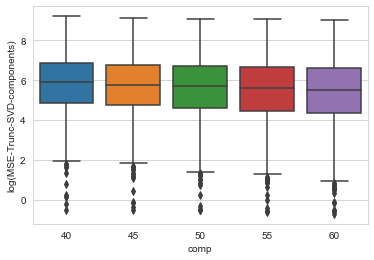

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
Boxplot= pd.read_csv("D:/Documents/final-year-project/ANALYSIS OF DR/trunc-svd-mse-analysis.csv")

sns.set_style("whitegrid")

sns.boxplot(x = 'comp', y = 'log(MSE-Trunc-SVD-components)', data = Boxplot)
plt.savefig('D:/Documents/final-year-project/ANALYSIS OF DR/Trunc_SVD_DR_analysis_boxplot.png', orientation = 'horizontal')